# 1、 模型调用的分类

角度1：按照模型功能的不同：
-非对话模型（LLMs、Text Model）
-对话模型（Chat Models）（推荐）
-嵌入模型（Embedding Models）

角度2：按照模型调用时，参数书写位置的不同：（api-key、base_url、model-name）
-硬编码：将参数书写到代码中
-使用环境变量方式
-使用配置文件方式（推荐）

角度3：具体API的调用
-使用LangChain提供的API（推荐）
-使用OpenAI官方API
-使用其他平台提供的PAI

# 2、 从角度1出发：按照功能不同举例
## 类型1：LLMs（非对话模型）
- 不支持多轮对话。每次调用独立处理输入，无法自动关联历史对话
- 局限：无法处理角色分工或复杂对话逻辑

## 类型2：Chat Models（对话模型）
ChatModels,也叫聊天模型，对话模型，底层使用LLMs。大预言模型调用，以ChatModel为主
主要特点如下：
- 输入：接受消息列表List[BaseMessage] 或 PromptVales 每条消息需要指定角色
- 输出：总是返回带角色的消息对象（BaseMessage子类），通常是AIMessage

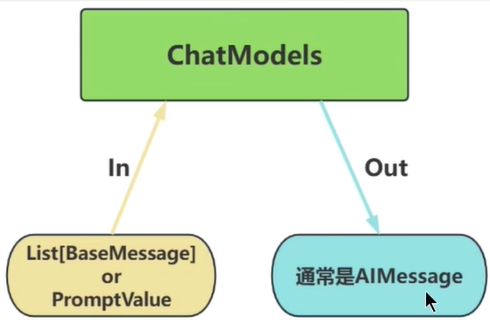
- 支持多轮对话。通过消息列表维护上下文，模型可基于完整对话历史生成回复
- 适用场景：对话系统

# 类型3：Embedding Model（嵌入模型）
Embedding Model：也叫文本嵌入模型，这些模型将文本作为输入并返回浮点数列表，也就是Embedding。

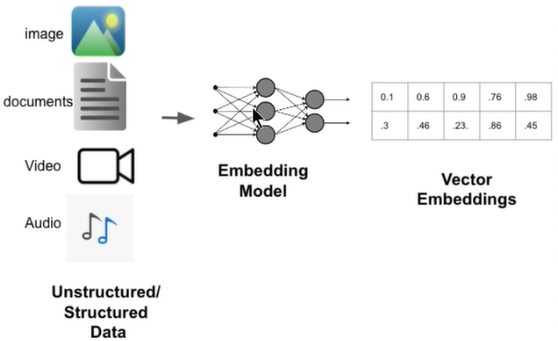

# 角度2出发：参数位置不同举例
这里以LangChain的API为准，使用对话模型，进行测试
## 模型调用的主要方法和参数
- OpenAI(...)/ChatOpenAI(...): 创建一个模型对象
- model.invoke(xxx):执行调用，将用户输入发送给模型
- .content：提取模型返回的实际文本内容
## 其他参数
- temperature：温度，控制生成文本的随机性，取值范围为0-1 （通常是0.8）
    - 值越低 -> 输出越确定、保守（适合事实回答）
    - 值越高 -> 输出越多样、有创意（适合创意写作）
- max_tokens：限制生成文本的最大长度，防止输出过长

## 3.1 硬编码方式
对话模型

In [1]:
# 调用对话模型
from langchain_openai import ChatOpenAI

chat_model = ChatOpenAI(model="deepseek-chat",      #默认使用的是  gpt-3.5-turbo
                        base_url="https://api.deepseek.com",
                        api_key="sk-3990a9f3869a4007ba32ce390e34e8f0"
                        )

# 调用模型
chat = chat_model.invoke("什么是LangChain？")

# 响应文本
print(chat.content)
print("---------------------------------------------------------")
print(chat)

E:\shangdj\python\env\conda\envs\myPython3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**LangChain** 是一个用于构建**大语言模型（LLM）驱动应用程序**的开源框架（Python和JavaScript）。它的核心目标是简化将LLM（如GPT-4、Llama等）与外部数据源和工具连接起来的过程，从而创建功能强大、实用的应用。

你可以把它想象成连接LLM与外部世界的“粘合剂”和“脚手架”。

### LangChain 解决的核心问题
单纯使用大模型API（如直接调用ChatGPT）存在一些局限性：
1.  **信息孤立**：LLM的训练数据是静态的，无法获取实时、私有的或特定领域的数据。
2.  **缺乏行动能力**：LLM本身无法执行具体操作（如计算、查询数据库、调用API）。
3.  **上下文限制**：LLM的输入有长度限制，难以处理长文档或复杂对话历史。
4.  **流程复杂**：构建一个多步骤、涉及多种组件的AI应用需要大量样板代码。

LangChain 提供了一套标准化的抽象和工具，优雅地解决了上述问题。

### LangChain 的核心概念和组件
其架构围绕以下几个关键模块构建：

1.  **模型（Models）**
    *   支持多种LLM接口（OpenAI、Anthropic、Cohere等）和嵌入模型。
    *   提供统一的调用方式，方便切换模型提供商。

2.  **提示（Prompts）**
    *   管理LLM的输入模板，支持动态提示、少量示例提示等。
    *   提供“提示模板”工具，使提示工程更加系统化和可复用。

3.  **链（Chains）**
    *   **LangChain的灵魂**。将多个组件按顺序组合成一个完整的应用程序流程。
    *   例如，一个链可以：`接收用户问题 -> 检索相关文档 -> 组合成提示 -> 发送给LLM -> 解析输出`。
    *   提供了`LCEL`（LangChain Expression Language）这种声明式语言，让构建链变得像管道操作一样简单。

4.  **检索增强生成（RAG - Retrieval-Augmented Generation）**
    *   这是LangChain最经典的应用模式。
    *   **流程**：将外部文档（如PDF、网页）进行分块、向量化并存入向量数据库。当用户提

非对话模型

In [1]:
# 调用非对话模型
from langchain_openai import OpenAI

chat_model = OpenAI(
    model="deepseek-chat",      #默认使用的是  gpt-3.5-turbo
    base_url="https://api.deepseek.com",
    api_key="sk-3990a9f3869a4007ba32ce390e34e8f0",
)

# 调用模型
chat = chat_model.invoke("什么是LangChain？")

# 响应文本
print(chat)

E:\shangdj\python\env\conda\envs\myPython3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BadRequestError: Error code: 400 - {'error': {'message': 'Failed to deserialize the JSON body into the target type: prompt: invalid type: sequence, expected a string at line 1 column 34', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}

## 3.2 使用环境变量方式


In [ ]:
# 调用对话模型
from langchain_openai import ChatOpenAI
import os

chat_model = ChatOpenAI(
    model="deepseek-chat",  #默认使用的是  gpt-3.5-turbo
    # 说明 ： 使用环境变量的方式在jupyter中执行不合适，需要在.py文件中执行
    base_url=os.environ['CHAT_BASE_URL'],
    api_key=os.environ['CHAT_API_KEY'],
)

# 调用模型
chat = chat_model.invoke("什么是LangChain？")

# 响应文本
print(chat.content)
print("---------------------------------------------------------")
print(chat)

## 3.3 使用配置文件的方式
使用.env的配置文件

In [1]:
import bs4
# 导入 dotenv 库 load_dotenv 函数，用于加载环境变量文件（.env）中的配置
import dotenv
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
import os

dotenv.load_dotenv()    # 加载当前目录下的 .env 文件
os.environ.setdefault("OPENAI_API_KEY", os.getenv("OPENAI_API_KEY"))
os.environ.setdefault("OPENAI_BASE_URL", os.getenv("OPENAI_BASE_URL"))


# 1. 设置模型
# 1.1 大语言模型
llm = ChatOpenAI(model="deepseek-chat")  # 调用大模型   默认使用gpt-3.5-turbo

# 直接提供问题，并调用llm
response = llm.invoke("什么是大模型")
print(response)

E:\shangdj\python\env\conda\envs\myPython3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


content='大模型（Large Language Model，简称LLM）是指**参数量巨大、训练数据量庞大、计算资源消耗显著的深度学习模型**。它们通常基于Transformer架构，通过海量文本数据训练，能够理解和生成人类语言，完成多种复杂任务。\n\n### 大模型的核心特征：\n1. **规模巨大**  \n   - **参数量**：通常达到数十亿甚至万亿级别（例如GPT-3有1750亿参数）。\n   - **训练数据**：使用互联网规模的文本库（如网页、书籍、论文等）。\n   - **算力需求**：需要高性能GPU集群进行训练，耗资巨大。\n\n2. **核心能力**  \n   - **上下文理解**：能处理长文本并捕捉语义关联。\n   - **泛化能力**：无需针对特定任务重新训练，通过提示（Prompt）即可适应多种任务。\n   - **生成与推理**：不仅能生成文本，还能进行简单逻辑推理、代码编写等。\n\n3. **典型代表**  \n   - **GPT系列**（OpenAI）：ChatGPT、GPT-4等。\n   - **Gemini**（Google）：多模态模型。\n   - **Claude**（Anthropic）：注重安全性与可控性。\n   - **开源模型**：LLaMA（Meta）、通义千问（阿里）、文心一言（百度）等。\n\n### 关键技术原理：\n- **Transformer架构**：基于自注意力机制（Self-Attention），并行处理序列数据，解决长距离依赖问题。\n- **预训练+微调**：  \n  - **预训练**：在无标注数据上学习语言规律（如预测下一个词）。  \n  - **微调**：用特定任务数据调整模型，或通过提示工程直接调用。\n- **对齐技术**：使用RLHF（人类反馈强化学习）使模型输出更符合人类价值观。\n\n### 应用场景：\n- **自然语言处理**：翻译、摘要、对话系统（如智能客服）。\n- **内容创作**：辅助写作、编程、设计创意。\n- **教育科研**：知识问答、论文润色、代码调试。\n- **企业工具**：文档分析、数据洞察、自动化报告。\n\n### 挑战与争议：\n- **算力与能耗**：训练成本高昂，碳排放问题受关注。\n- **幻觉问题**：

# 3.4 其他参数
- temperature
- max_tokens

In [2]:
import bs4
# 导入 dotenv 库 load_dotenv 函数，用于加载环境变量文件（.env）中的配置
import dotenv
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
import os

dotenv.load_dotenv()    # 加载当前目录下的 .env 文件
os.environ.setdefault("OPENAI_API_KEY", os.getenv("OPENAI_API_KEY"))
os.environ.setdefault("OPENAI_BASE_URL", os.getenv("OPENAI_BASE_URL"))


# 1. 设置模型
# 1.1 大语言模型
llm = ChatOpenAI(
    model="deepseek-chat",
    temperature=0.7,
    max_tokens=20
)  # 调用大模型   默认使用gpt-3.5-turbo

# 直接提供问题，并调用llm
response = llm.invoke("什么是大模型")
print(response)

content='大模型（Large Language Model，简称LLM）是指**参数量巨大、训练数据量庞大的深度学习模型**，通常指基于Transformer架构的自然语言处理模型。它们能够理解和生成人类语言，完成多种复杂任务。\n\n### 主要特点：\n1. **规模巨大**  \n   - 参数量可达**数十亿至数万亿**（例如GPT-3有1750亿参数，GPT-4推测达万亿级）。\n   - 训练数据涵盖海量文本（如网页、书籍、论文等）。\n\n2. **通用性强**  \n   - 通过预训练学习语言的通用规律，无需针对每项任务单独训练。\n   - 可通过提示（Prompt）或微调适应不同任务（翻译、编程、问答等）。\n\n3. **涌现能力**  \n   - 当模型规模超过某个阈值时，会表现出小模型不具备的能力（如复杂推理、代码生成）。\n\n### 典型代表：\n- **GPT系列**（OpenAI）：生成式预训练模型，支持对话、创作等。\n- **BERT**（Google）：专注于文本理解，用于搜索、分类。\n- **Claude**（Anthropic）：注重安全性和对齐性。\n- **Llama**（Meta）：开源模型，推动社区发展。\n- **文心一言**（百度）、**通义千问**（阿里）：国内代表性大模型。\n\n### 核心技术：\n- **Transformer架构**：基于自注意力机制处理序列数据。\n- **预训练+微调**：先在大规模数据上预训练，再针对特定任务微调。\n- **提示工程**：通过设计输入文本引导模型输出所需内容。\n\n### 应用场景：\n- **内容生成**：写作、翻译、编程辅助。\n- **智能对话**：客服、虚拟助手。\n- **知识问答**：基于信息的准确回答。\n- **多模态交互**：结合图像、音频（如GPT-4V）。\n\n### 挑战与争议：\n- **算力需求**：训练需大量GPU，成本高昂。\n- **幻觉问题**：可能生成不准确或虚构内容。\n- **偏见与安全**：训练数据中的偏见可能被放大。\n- **能耗问题**：训练和推理消耗大量电力。\n\n### 未来趋势：\n- **多模态融合**：同时处理文本、图像、声音。\n- **小型化与高效化**：在保持性能的同时降低计

# 4、角度3出发：各平台API的调用举例
## 4.1、OpenAI官方API
考虑到OpenAI在国内访问及充值的不便，我们仍然使用CloseAI网站注册和充值

调用非对话模型  (跑不通  原因未知)

In [1]:
from openai import OpenAI

import dotenv
import os

print(os.getenv("OPENAI_API_KEY"))
print(os.getenv("OPENAI_BASE_URL"))


# 从环境变量中读取API密钥（推荐安全存储）
client = OpenAI(
    api_key="sk-3990a9f3869a4007ba32ce390e34e8f0",
    base_url="https://api.deepseek.com",
)

# 调用Completion接口
response = client.completions.create(
    model="deepseek-chat",
    prompt="请将以下英文翻译成中文：\n I am king of the world",
    max_tokens=20,      # 生成文本最大长度
    temperature=0.7,    # 控制随机性
)

# 提取结果
print(response.choices[0].text.strip())

None
None


BadRequestError: Error code: 400 - {'error': {'message': 'completions api is only available when using beta api (set base_url="https://api.deepseek.com/beta")', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}

# 5、如何选择合适的大模型
## 5.1 有没有最好的大模型
注意：没有最好的大模型，只有最适合的大模型
- 榜单：https://lmarena.ai/leaderboard


# 6、总结
1. 对话模型/非对话模型
- 主要区别：对话模型输出是AIMessage。而非对话模型的输出是str
2. 配置文件读取参数
3. LangChain的统一方式调用API